# Zomato Bangalore Restaurants
## Dataset focused on restaurant landscape and location-based decision making

### Dataset Overview
This notebook analyzes the Zomato Bangalore Restaurants dataset to gain insights into the restaurant industry in Bangalore, India.
The goal is to determine the best location to open a new restaurant based on customer ratings, demand, cost, cuisine trends, and availability of services like online ordering.

### Objective
Perform exploratory data analysis (EDA) focused on location.
Understand restaurant distribution, popular areas, and customer preferences.
Identify the most strategic place to open a restaurant in Bangalore.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [3]:
df.shape

(51717, 17)

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
df.describe(include = "object").T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/the-nest-the-...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


In [9]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [10]:
(df.isnull().sum() / len(df)) * 100

,0
url,0.000000
address,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
phone,2.335789
location,0.040606
rest_type,0.438927


### check for empty lists

In [11]:
df['menu_item'].isnull().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df[df.duplicated(subset=['name', 'location'])].shape

(39566, 17)

In [14]:
df.nunique()

,0
url,51717
address,11495
name,8792
online_order,2
book_table,2
rate,64
votes,2328
phone,14926
location,93
rest_type,93


# Data Cleaning

In [15]:
df.rename(columns={'approx_cost(for two people)': 'cost_for_two', 'listed_in(type)': 'listed_type' , 'listed_in(city)': 'listed_city'}, inplace=True)
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_for_two', 'reviews_list', 'menu_item', 'listed_type',
       'listed_city'],
      dtype='object')

In [16]:
#Here we are searching for restaurant names that have weird characters in it
corrupt_df = df[df['name'].str.contains('Ã|�||©', na=False)] #na = false means avoiding errors from Nan values
print(corrupt_df.shape)

(269, 17)


In [17]:
corrupt_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,listed_type,listed_city
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
193,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Delivery,Banashankari
566,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,080 26724489\r\r\r\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...","['Nutella Crepe', 'Waffles with Nutella', 'Veg...",Dine-out,Banashankari
974,https://www.zomato.com/bangalore/bohra-bohra-c...,"Shop 1, 129, 24th Main, 5th Phase, JP Nagar, B...",Bohra Bohra CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,3.6/5,43,+91 9880101051\r\r\n+91 9742661909,JP Nagar,Quick Bites,"Fruit Custard, Russian Cutlet",Bohri,300,"[('Rated 4.0', 'RATED\n If your craving to tr...","['Caramel Custard', 'Smoked Chicken Kheema Sam...",Delivery,Bannerghatta Road
1303,https://www.zomato.com/bangalore/foreign-caf%C...,"45, 14th Main, 7th Phase, Puttehahalli Palya, ...",Foreign CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,NaN,0,+91 8375867011\r\n+91 8217793626,JP Nagar,Delivery,NaN,Continental,500,[],[],Delivery,Bannerghatta Road


In [18]:
def clean_name(name):
    if pd.isna(name):
        return name

    allowed_chars = (
        "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        "abcdefghijklmnopqrstuvwxyz"
        "0123456789"
        " -_.'\",&()"   # add more punctuation if needed
    )

    cleaned = ''.join(ch for ch in name if ch in allowed_chars)
    return cleaned.strip()

df['name'] = df['name'].apply(clean_name)


In [19]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### removing nan values from the rate column and converting the string values to float for numerical analysis

In [20]:
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+(?:\.\d+)?)', expand=False).astype(float)
df['rate'].dtypes

dtype('float64')

In [21]:
df.describe()


,rate,votes
count,41665.000000,51717.000000
mean,3.700449,283.697527
std,0.440513,803.838853
min,1.800000,0.000000
25%,3.400000,7.000000
50%,3.700000,41.000000
75%,4.000000,198.000000
max,4.900000,16832.000000


In [22]:
df['cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [23]:
df['cost_for_two'] = df['cost_for_two'].astype(str).apply(lambda x: x.replace(',','') if isinstance(x,str) else x)
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors = 'coerce')
df['cost_for_two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
#Filling Nan values
df['rest_type'] = df['rest_type'].fillna('Others')
df['cuisines'] = df['cuisines'].fillna('Unknown')
df['dish_liked'] = df['dish_liked'].fillna('Unknown')

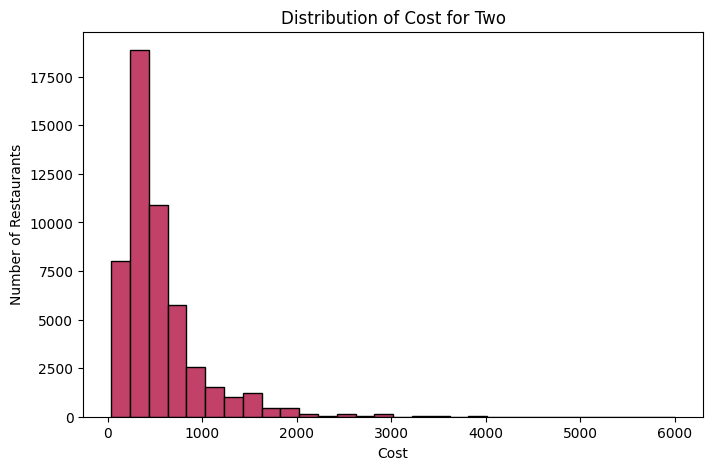

In [25]:
#Determining how the NaN in cost column will be filled
#plotting the distribution of cost column after converting it to numerical values
flare_color = sns.color_palette("flare", n_colors=1)[0]
plt.figure(figsize=(8, 5))
df['cost_for_two'].hist(bins=30, color=flare_color, edgecolor='black')
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')
plt.grid(False)
plt.show()
#Since its right skewed, we will use median


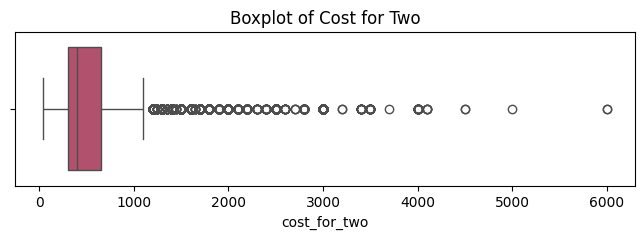

In [26]:
plt.figure(figsize=(8, 2))
sns.boxplot(x='cost_for_two', data=df, color=flare_color)
plt.title('Boxplot of Cost for Two')
plt.show()
#outliers are detected, this is further proof for not using mean as mean is more sensitive to outliers

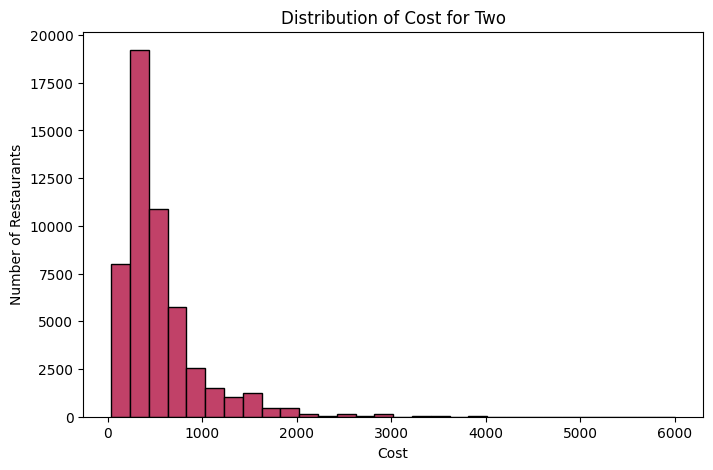

In [27]:
#filling the NaN in 'cost_for_two" with the median and checking the distribution if it got affected
df[ 'cost_for_two'] = df['cost_for_two'].fillna(df['cost_for_two'].median())
plt.figure(figsize=(8, 5))
df['cost_for_two'].hist(bins=30, color=flare_color, edgecolor='black')
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')
plt.grid(False)
plt.show()

In [28]:
#Converting columns into boolean Dtype
df['online_order'] = df['online_order'].map({'Yes': True, 'No': False})
df['book_table'] = df['book_table'].map({'Yes': True, 'No': False})
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,listed_type,listed_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [29]:
#Capitalizing letters for better view
df['rest_type'] = df['rest_type'].astype(str).apply(lambda x: ', '.join([s.strip().title() for s in x.split(',')]))
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ', '.join([s.strip().title() for s in x.split(',')]))
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,listed_type,listed_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [30]:
#checking the similarity in 'listed_city' and 'location'
df['listed_city'].unique()
#doesn't contain nan values

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [31]:
df['location'].unique()
#more broad than listed_city, contains nan values
#Every listed_city value is also found in location but not vice versa.

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [32]:
#Seeing the number of nan values here
df['location'].isna().sum()

np.int64(21)

In [33]:
#check if all the listed_city values also exist in the location column
#pd.Series(df['listed_city'].unique()).isin(df['location'].unique()).shape
listed_city_unique = df['listed_city'].unique()
location_unique = df['location'].unique()
matches = pd.Series(listed_city_unique).isin(location_unique)
print(f"{matches.sum()} matches out of {len(matches)} total listed_city values are present in location.")

30 matches out of 30 total listed_city values are present in location.


In [34]:
df.groupby(by=['listed_city'], dropna=False)[['location']].value_counts()

listed_city  location             
BTM          BTM                      1130
             Koramangala 5th Block     439
             JP Nagar                  288
             HSR                       284
             Bannerghatta Road         254
                                      ... 
Whitefield   KR Puram                   17
             Marathahalli               12
             East Bangalore             10
             Bellandur                   4
             Old Airport Road            1
Name: count, Length: 707, dtype: int64

In [35]:
#filling the nan values in location column from the listed_city column
df['location'] = df['location'].fillna(df['listed_city'])

In [36]:
#I will create a copy of my og dataframe with no listed_city column
df1 = df.drop(columns=['listed_city']).copy()

In [37]:
#checking the similarity between 'listed_type' and 'rest_type'
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Others', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
 

In [38]:
df['listed_type'].unique()


array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [39]:
pd.Series(df['listed_type'].unique()).isin(df['rest_type'].unique()).shape
#rest_type is more detailed

(7,)

In [40]:
df.groupby(by=['listed_type'], dropna=False)[['rest_type']].value_counts()

listed_type    rest_type              
Buffet         Casual Dining              599
               Casual Dining, Bar          88
               Fine Dining                 78
               Lounge                      21
               Casual Dining, Cafe         15
                                         ... 
Pubs and bars  Cafe                         1
               Casual Dining                1
               Delivery                     1
               Dessert Parlor, Cafe         1
               Sweet Shop, Quick Bites      1
Name: count, Length: 315, dtype: int64

### after analyzing listed_type & rest_type columns i think the rest_type has more details but some times it's missing if Delivery is available. so i will create a 'Delivery' column and only fill the rows of restaurant that offer delivery with 'True'

### before that, i will fill the null values in 'rest_type' column with the corrosponding 'listed_type' column values to make sure i dont miss out any type of restaurant, at the end i will one-hot-encode the 'rest_type' column that contains all the unique values from 'rest_type' and 'listed_type'

In [41]:
df1['rest_type'] = df1['rest_type'].fillna(df1['listed_type'])

In [42]:
df1['delivery'] = df1['listed_type'].str.contains('delivery', case=False, na=False) #case= false, case sensitivty
df1['delivery'].value_counts()

,count
delivery,
True,25942
False,25775


In [43]:
# replace similarly writen values with the same value
df1['rest_type'] = df1['rest_type'].str.lower().str.strip().replace({r'\bcafes\b': 'cafe', r'\bdesserts\b': 'dessert parlor'}, regex=True)

In [44]:
x = df1['rest_type'].dropna().str.split(',\s*').explode().str.strip()
dummies = pd.get_dummies(x).groupby(x.index).max() .add_prefix('type_')
df1 = pd.concat([df1, dummies], axis=1)
df1.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2093214142.py:1: SyntaxWarning: invalid escape sequence '\s'
  x = df1['rest_type'].dropna().str.split(',\s*').explode().str.strip()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,type_lounge,type_meat shop,type_mess,type_microbrewery,type_others,type_pop up,type_pub,type_quick bites,type_sweet shop,type_takeaway
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,casual dining,...,False,False,False,False,False,False,False,False,False,False
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,080 41714161,Banashankari,casual dining,...,False,False,False,False,False,False,False,False,False,False
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+91 9663487993,Banashankari,"cafe, casual dining",...,False,False,False,False,False,False,False,False,False,False
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+91 9620009302,Banashankari,quick bites,...,False,False,False,False,False,False,False,True,False,False
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,casual dining,...,False,False,False,False,False,False,False,False,False,False


### i will ensure that the 'delivery' column values are set to 'True' when the restaurant has the 'type_delivery' set as 'True' as well

In [45]:
df1.loc[df1['type_delivery'] == True, 'delivery'] = True

### i will create a new copy of my prev df since im applying one-hot-encoding on cuisines too


In [46]:
df2 = df1.copy()

### i will one-hot-encode the cuisines column but only keep the cuisines that appear in more than 1k restaurants

In [47]:
y = df2['cuisines'].dropna().str.split(',\s*').explode().str.strip()
counts = y.value_counts()
dummies2 = (
    pd.get_dummies(y)
      .loc[:, counts[counts > 1000].index.tolist()]
      .groupby(y.index)
      .max()
      .add_prefix('cuisine_')
)

df2 = pd.concat([df2, dummies2], axis=1)
df2.columns

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2429513307.py:1: SyntaxWarning: invalid escape sequence '\s'
  y = df2['cuisines'].dropna().str.split(',\s*').explode().str.strip()


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_for_two', 'reviews_list', 'menu_item', 'listed_type', 'delivery',
       'type_bakery', 'type_bar', 'type_beverage shop', 'type_bhojanalya',
       'type_cafe', 'type_casual dining', 'type_club', 'type_confectionery',
       'type_delivery', 'type_dessert parlor', 'type_dhaba',
       'type_fine dining', 'type_food court', 'type_food truck',
       'type_irani cafee', 'type_kiosk', 'type_lounge', 'type_meat shop',
       'type_mess', 'type_microbrewery', 'type_others', 'type_pop up',
       'type_pub', 'type_quick bites', 'type_sweet shop', 'type_takeaway',
       'cuisine_North Indian', 'cuisine_Chinese', 'cuisine_South Indian',
       'cuisine_Fast Food', 'cuisine_Biryani', 'cuisine_Continental',
       'cuisine_Desserts', 'cuisine_Cafe', 'cuisine_Beverages',
       'cuisine_Italian', 'cuisine_Bakery', 'cuisine_Street Food',
 

In [48]:
def Zscore_outlier(col):
    out=[]
    m = np.mean(col)
    sd = np.std(col)
    for i in col:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    out.sort()
    print("Outliers:",out)

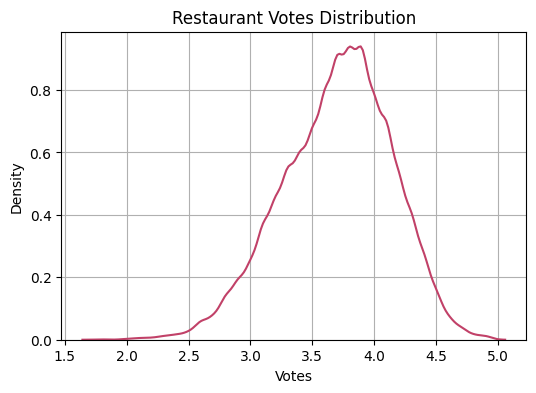

In [49]:
flare_color = sns.color_palette("flare", 5)[2]
plt.figure(figsize=(6, 4))
sns.kdeplot(df['rate'].dropna(), color=flare_color)
plt.title('Restaurant Votes Distribution')
plt.xlabel('Votes')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [50]:
Zscore_outlier(df['rate'].dropna())

Outliers: [1.8, 1.8, 1.8, 1.8, 1.8, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3]


### most of the ratings are between 3.0 and 4.5. according to z score all the outliers are 2.3 and 1.8

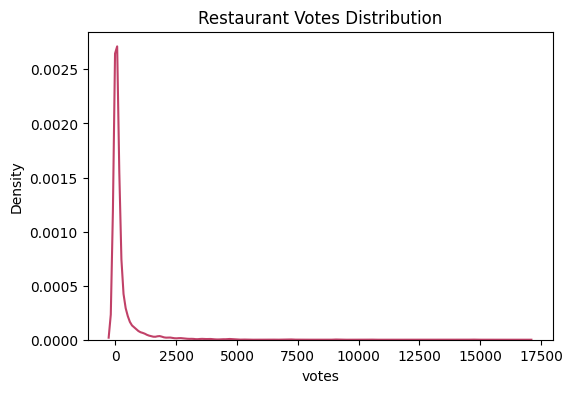

In [51]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['votes'].dropna(), color=flare_color)
plt.title('Restaurant Votes Distribution')
plt.xlabel('votes')
plt.ylabel('Density')
plt.show()

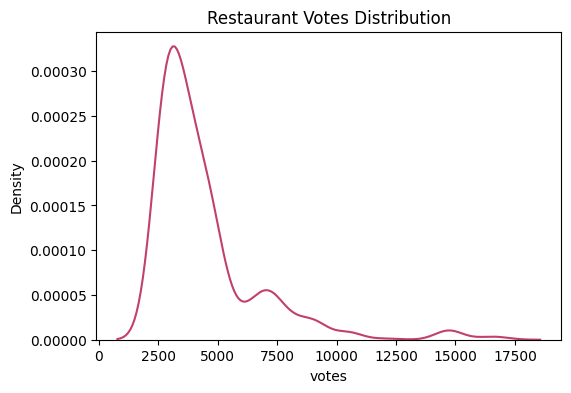

In [52]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['votes'][df['votes'] > 2500].dropna(), color=flare_color)
plt.title('Restaurant Votes Distribution')
plt.xlabel('votes')
plt.ylabel('Density')
plt.show()

### number of votes is very skewed to the right which means there is many outliers

In [53]:
Zscore_outlier(df['votes'][df['votes'] > 2500].dropna())

Outliers: [12121, 12121, 14654, 14654, 14654, 14690, 14694, 14704, 14710, 14710, 14710, 14717, 14717, 14723, 14723, 14723, 14726, 14956, 14956, 16345, 16345, 16345, 16832, 16832, 16832]


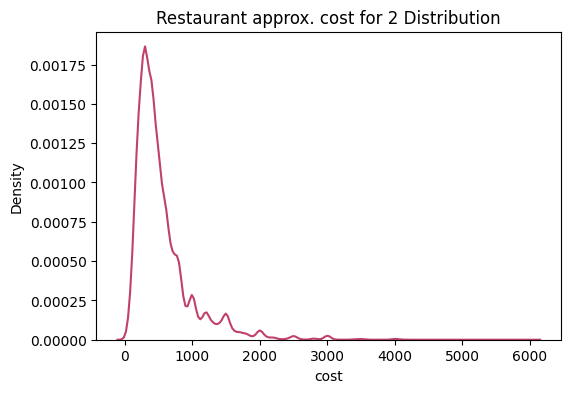

In [54]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['cost_for_two'].dropna(), color=flare_color)
plt.title('Restaurant approx. cost for 2 Distribution')
plt.xlabel('cost')
plt.ylabel('Density')
plt.show()

### cost is skewed to the right, with most of the values smaller than 1000

### here i will check online orders availability percentage in restaurants

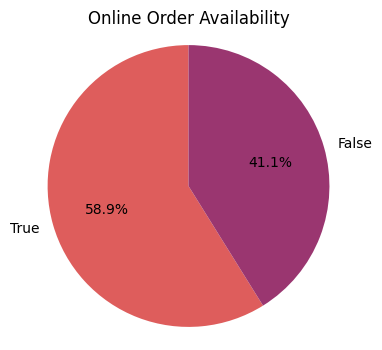

In [55]:
flare_colors = sns.color_palette("flare", n_colors=2).as_hex()
online_order_counts = df['online_order'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(online_order_counts, labels=online_order_counts.index, colors=flare_colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Online Order Availability')
plt.axis('equal')
plt.show()

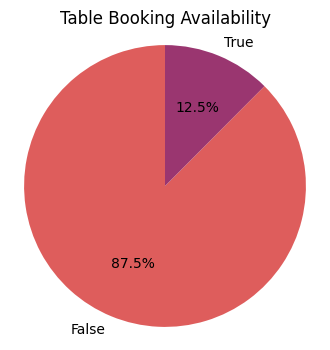

In [56]:
book_table_counts = df['book_table'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(book_table_counts,
        labels=book_table_counts.index,
        colors=flare_colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Table Booking Availability')
plt.axis('equal')
plt.show()

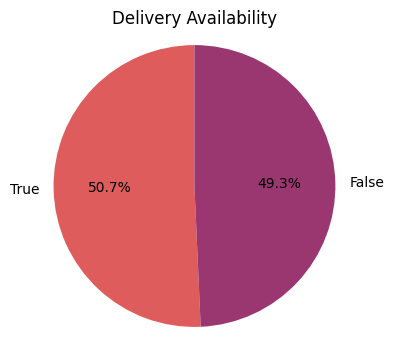

In [57]:
delivery_counts = df1['delivery'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(
    delivery_counts,
    labels=delivery_counts.index,
    colors=flare_colors,
    autopct='%1.1f%%',
    startangle=90)
plt.title('Delivery Availability')
plt.axis('equal')
plt.show()

In [58]:
df.describe()

,rate,votes,cost_for_two
count,41665.000000,51717.000000,51717.000000
mean,3.700449,283.697527,554.391689
std,0.440513,803.838853,437.563723
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


# Business Questions
### 1. Which areas in Bangalore has the most restaurants?

In [59]:
locations = df['location'].dropna().unique()
location_coords = {}
for loc in locations:
    try:
        full_loc = f"{loc}, Bangalore, India"
        location = geolocator.geocode(full_loc)
        if location:
            location_coords[loc] = (location.latitude, location.longitude)
        else:
            location_coords[loc] = (None, None)
        time.sleep(1)  # to respect usage limits
    except:
        location_coords[loc] = (None, None)


coords_df = pd.DataFrame.from_dict(location_coords, orient='index', columns=['lat', 'lon']).reset_index()
coords_df.columns = ['location', 'lat', 'lon']

In [60]:
location_df = df['location'].value_counts().reset_index()
location_df.columns = ['location', 'restaurant_count']

# Merge with coordinates
map_df = location_df.merge(coords_df, on='location', how='left')
location_df.head()

,location,restaurant_count
0,BTM,5125
1,HSR,2524
2,Koramangala 5th Block,2507
3,JP Nagar,2235
4,Whitefield,2144


In [61]:
top_locations = df['location'].value_counts().nlargest(10).reset_index()
top_locations.columns = ['location', 'count']

/tmp/ipython-input-3469879921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


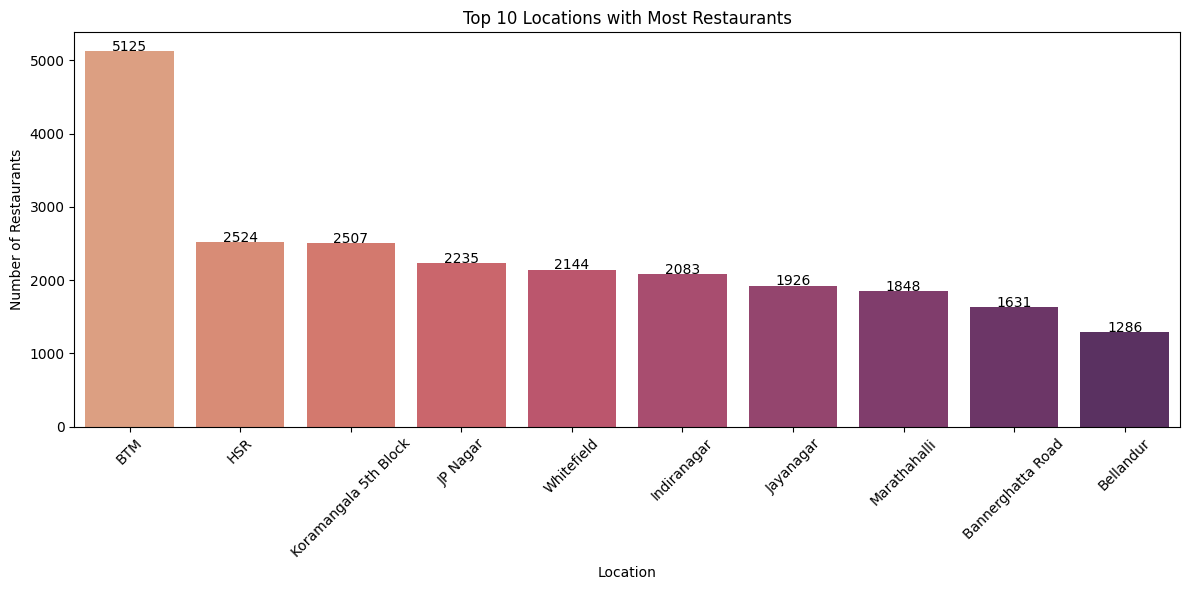

In [62]:
# palette
flare_colors = sns.color_palette("flare", n_colors=len(top_locations))

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_locations,
    x='location',
    y='count',
    palette=flare_colors
)

# Add text labels on bars
for i, row in top_locations.iterrows():
    plt.text(i, row['count'] + 1, row['count'], ha='center')

plt.title("Top 10 Locations with Most Restaurants")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### a map representation of restaurant distribution across bangalore

In [63]:
import plotly.express as px
import plotly.graph_objects as go

map_df_clean = map_df.dropna(subset=['lat', 'lon'])

flare_palette = sns.color_palette("flare", as_cmap=True)
flare_colorscale = [
    [i / 9, color] for i, color in enumerate(sns.color_palette("flare", 10).as_hex())]

fig = px.scatter_mapbox(
    map_df_clean,
    lat="lat",
    lon="lon",
    size="restaurant_count",
    hover_name="location",
    hover_data={"restaurant_count": True, "lat": False, "lon": False},
    color="restaurant_count",
    color_continuous_scale=flare_colorscale,
    size_max=30,
    zoom=11,
    title="Number of Restaurants by Location in Bangalore")
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": 12.9716, "lon": 77.5946},
    margin={"r": 0, "t": 40, "l": 0, "b": 0})

fig.show()

Key Findings:

BTM is the most restaurant dense area in Bangalore.

Following BTM, HSR and Koramangala 5th Block are significant restaurants

Other prominent locations in the top 10 include JP Nagar, Whitefield, Indiranagar, Jayanagar, Marathahalli, Bannerghatta Road, and Bellandur, each hosting over 1,000 restaurants.

Strategic Implications for a New Restaurant:

High Competition in Busy Areas: Opening a restaurant in places like BTM, HSR, or Koramangala means facing a lot of competition. These areas have many people and high demand, but to succeed, your restaurant must have something special and strong marketing.

Choosing Growing Areas: Places like Whitefield and Indiranagar are also good choices. They are busy, with both homes and offices, and can support many restaurants.

Know the Local People: The large number of restaurants in these areas shows that people have different tastes and eat out often. Before opening, it's important to research the types of people living there and what kinds of restaurants are still missing.

## 2.Which locations have the highest-rated restaurants?

In [64]:
location_ratings = df.groupby('location')['rate'].agg(['mean', 'count']).reset_index()
location_ratings.columns = ['location', 'average_rate', 'count']
location_ratings = location_ratings.dropna(subset=['average_rate'])
location_ratings = location_ratings.sort_values(by='average_rate', ascending=False)

In [65]:
top10_locations = location_ratings.head(10)
top10_locations.style.background_gradient(cmap='flare', axis=0)

,location,average_rate,count
51,Lavelle Road,4.142505,487
43,Koramangala 3rd Block,4.020419,191
81,St. Marks Road,4.017201,343
45,Koramangala 5th Block,4.005821,2319
12,Church Street,3.992125,546
75,Sankey Road,3.965385,26
44,Koramangala 4th Block,3.918668,841
15,Cunningham Road,3.901053,475
70,Residency Road,3.863636,605
52,MG Road,3.855857,811


Key Findings:

Lavelle Road stands out with the highest average rating of 4.14 across 487 restaurants. This suggests a strong presence of consistently high-quality eateries.

Koramangala 3rd Block (4.02 average rating for 191 restaurants) and St. Marks Road (4.01 average rating for 343 restaurants) also feature very high average ratings.

Koramangala 5th Block, which we identified as one of the top locations by restaurant count, also makes it to the top-rated list, with an average rating of 4.00 across a substantial 2,319 restaurants. This indicates a large market with generally high-quality options.

Other locations like Church Street, Sankey Road, Koramangala 4th Block, Cunningham Road, Residency Road, and MG Road complete the top 10, all showing average ratings above 3.85.

Strategic Implications for a New Restaurant:

Premium Areas: Places like Lavelle Road, St. Marks Road, and Church Street attract customers who care about quality. If you want to open a high-end restaurant, these spots could be great because people there seem to value and rate good food highly.

Quality + Quantity: Koramangala 5th Block is interesting—it has many restaurants and still keeps high ratings. That means it’s a busy food area where both great food and lots of options exist.




## 3. What is the approximate cost for two in the different type of restaurants in banglore?

In [66]:
type_cols = [col for col in df2.columns if col.startswith('type_')]
melted = df2[['cost_for_two'] + type_cols].melt(id_vars='cost_for_two',
                                        value_vars=type_cols,
                                        var_name='restaurant_type',
                                        value_name='is_type')
melted = melted[melted['is_type'] == 1]
melted['restaurant_type'] = melted['restaurant_type'].str.replace('type_', '').str.replace('_', ' ')
avg_cost_by_type = melted.groupby('restaurant_type')['cost_for_two'].mean().sort_values(ascending=False)

/tmp/ipython-input-3683157790.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




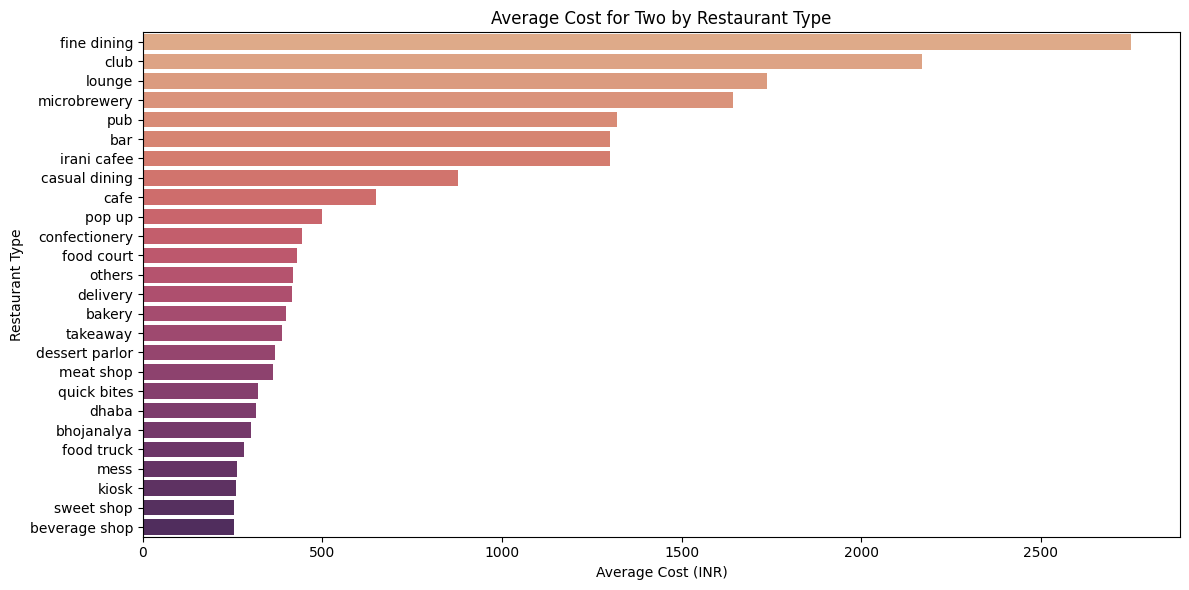

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost_by_type.values, y=avg_cost_by_type.index, palette='flare')
plt.title('Average Cost for Two by Restaurant Type')
plt.xlabel('Average Cost (INR)')
plt.ylabel('Restaurant Type')
plt.tight_layout()
plt.show()

Key Findings:

High-End Dining: Fine Dining restaurants are, as expected, the most expensive, with an average cost for two significantly higher than any other type.
Club and Lounge establishments also command a high average cost, reflecting their typically upscale ambiance and service beyond just food.

Microbrewery and Pub types follow, indicating that establishments focused on beverages and an experience also tend to be pricier than standard restaurants.

Mid-Range Dining:
Irani Cafe, Casual Dining, and Cafe fall into a mid-range, suggesting they offer a balance of price and experience.

Budget-Friendly / Quick Service:
Categories like Confectionery, Food Court,..etc are the most affordable, with Beverage Shop being the least expensive.

Strategic Implications for a New Restaurant:

Set Prices Based on Type: The kind of restaurant you open affects how much people expect to pay. For example, fine dining can charge more, while quick bites should stay affordable.

Know the Market: Look at what similar restaurants charge. If you're opening a casual dining place, check the average prices for that type in Bangalore to stay competitive.

Match Customer Expectations: Expensive restaurants are expected to offer a full experience—great atmosphere, service, and menu. Cheaper places focus on speed, convenience, or a specific item. Make sure your plan fits what customers will expect at your price level.

## 4.How does the approximate cost in restaurant contribute to its rating?

In [68]:
df3 = df[['cost_for_two', 'rate']].dropna()

# calculate z-scores manually
z_scores = (df3 - df3.mean()) / df3.std()

# remove outliers
cost_no_outliers = df3[(abs(z_scores) < 3).all(axis=1)]


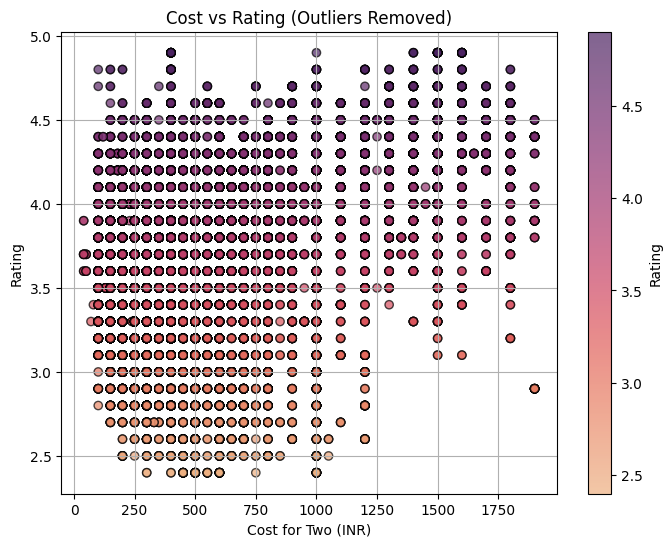

In [69]:
flare_cmap = sns.color_palette("flare", as_cmap=True)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    cost_no_outliers['cost_for_two'],
    cost_no_outliers['rate'],
    c=cost_no_outliers['rate'],
    cmap=flare_cmap,
    edgecolor='k',
    alpha=0.7
)
plt.colorbar(scatter, label='Rating')
plt.title('Cost vs Rating (Outliers Removed)')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [70]:
cost_no_outliers.corr()

,cost_for_two,rate
cost_for_two,1.000000,0.400808
rate,0.400808,1.000000


Key Findings

Scatter Plot Insights:

As cost for two increases, restaurant ratings also tend to increase But there’s a lot of variation, especially in the low to mid price range.

Many affordable restaurants have good ratings. Some expensive ones have only average ratings. Most restaurants are priced below 1000–1200, showing that this is the most common price range.

Correlation Coefficient:

The correlation between cost and rating is 0.40, which means:

There is a moderate positive relationship
As cost goes up, rating often goes up too
But it’s not a strong link, other factors matter too.
Strategic Takeaways for a New Restaurant

Higher Prices = Higher Expectations: If your restaurant is expensive, customers will expect top-quality food, service, and ambiance. You must deliver that to earn high ratings.

Stand Out at Lower Prices: In the lower and mid-price range, competition is tough. Focus on great value for money or a unique concept to attract customers and get good ratings.

Price Isn’t Everything: A higher price may help, but it won’t guarantee success. Focus on overall quality including your menu, service, and atmosphere to win customer satisfaction.

## 5. What are the most common Cuisines in Bangalore?

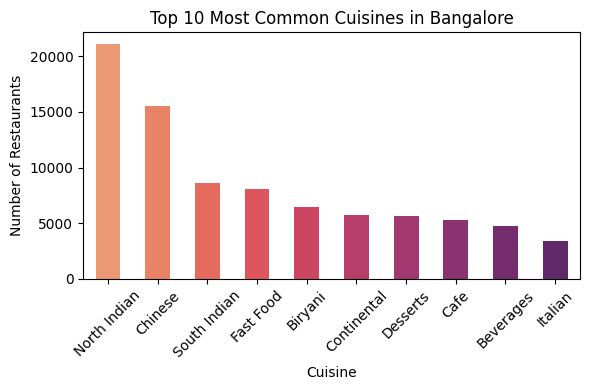

In [71]:
top_cuisines = counts.head(10)
plt.figure(figsize=(6, 4))
top_cuisines.plot(kind='bar', color=flare_colors)
plt.title('Top 10 Most Common Cuisines in Bangalore')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Findings

North Indian is Most Popular: Over 15,000 restaurants serve North Indian food

Chinese Comes Next: More than 10,000 restaurants offer Chinese dishes

South Indian & Fast Food: Both have 5,000+ restaurants.

Diverse Food Scene: Cuisines like Biryani, Continental, Desserts, Cafes, Beverages, and Italian are also common, showing variety in options

Strategic Takeaways for a New Restaurant

Popular = Competitive: Choosing North Indian or Chinese cuisine means entering a highly competitive market. You’ll need to stand out with something special like a signature dish, a fusion concept, excellent service, or competitive pricing.

Big Customer Base: These popular cuisines show strong demand, so if done well, there’s a huge market to tap into.

Niche = Opportunity: Less common cuisines still have plenty of restaurants, meaning there’s proven interest. Exploring fusion, regional sub-cuisines, or underrepresented food styles could help you enter with less competition

## 6. Which cuisines are most likely to be in high-rated restaurants?

In [72]:
high_rated = df2[df2['rate'].ge(4.5)]

In [73]:
cuisine_cols = [col for col in df2.columns if col.startswith('cuisine_')]
high_rated_counts = high_rated[cuisine_cols].sum().sort_values(ascending=False)

In [74]:
all_counts = df2[cuisine_cols].sum()
likelihood = (high_rated_counts / all_counts).sort_values(ascending=False)

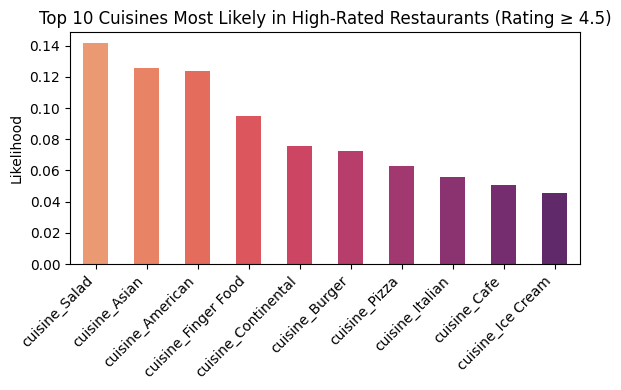

In [75]:
plt.figure(figsize=(6, 4))
likelihood.head(10).plot(kind='bar', color=flare_colors)
plt.ylabel('Likelihood')
plt.title('Top 10 Cuisines Most Likely in High-Rated Restaurants (Rating ≥ 4.5)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Key Findings Top-Rated Cuisines:

Salad restaurants have the highest chance of getting a 4.5+ rating.

Asian and American cuisines also do very well in high-rated restaurants.

Finger Food, Continental, Burger, Pizza, Italian, Cafe, and Ice Cream also show up often in top rated places.

Quality vs. Quantity: North Indian and Chinese are the most common, but they don’t appear in the top 10 for high ratings. This means these cuisines may have more competition or mixed quality, making it harder to consistently get top ratings.

Strategic Insights for a New Restaurant

Go Niche for High Ratings: Want to be known for quality? Consider specializing in Salad, Asian, or American cuisine — they have a higher chance of success in ratings.

Stand Out in Popular Cuisines: If you choose North Indian or Chinese, you’ll face more competition. You’ll need exceptional quality, a unique concept

Know What Customers Want: Cuisines like Burger, Pizza, Cafe, etc., usually focus on specific dishes and offer a modern or casual vibe. High ratings in these show customers love well-done, focused menus.

## 6.1 What are the highest rated restaurants and what cuisines do they serve?

In [76]:
top10 = df2.sort_values(by='rate', ascending=False).dropna(subset=['cuisines']).head(60).copy()

# Correct and warning-free
top10['cuisines_split'] = top10['cuisines'].str.split(r',\s*')

top10_exploded = top10.explode('cuisines_split')
top10_exploded['cuisines_split'] = top10_exploded['cuisines_split'].str.strip()

In [77]:
fig = px.scatter(
    top10_exploded,
    x='name',
    y='cuisines_split',
    hover_data=['rate'],
    title='Cuisines Served by Top 10 Highest-Rated Restaurants',
    color='cuisines_split'
)
fig.update_layout(
    xaxis_tickangle=45,
    title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 18}},
    xaxis_title='Restaurant Name',
    yaxis_title='Cuisine'
)
fig.show()

Strategic Insights for a New Restaurant

Specialize or Excel at Diversity: To be a top-rated place, either focus on one type of cuisine and do it brilliantly (like desserts or Asian food), or offer a diverse menu with consistently high quality across all items.

Go Beyond the Basics: Just offering “North Indian” or “Chinese” food won’t guarantee success You need a unique twist, outstanding food, or a memorable experience to truly stand out.

## 7. what is the percentage of delivery only from all the delivery resturants?

/tmp/ipython-input-1255669433.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



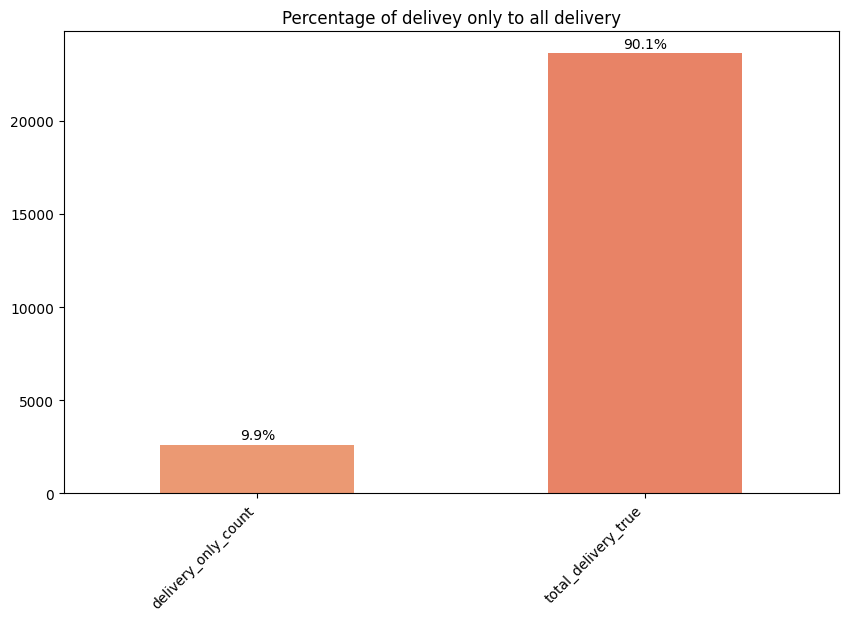

In [78]:
rest_types = [
    'type_bakery', 'type_bar', 'type_beverage shop', 'type_bhojanalya',
       'type_cafe', 'type_casual dining', 'type_club', 'type_confectionery',
       'type_dessert parlor', 'type_dhaba',
       'type_fine dining', 'type_food court', 'type_food truck',
       'type_irani cafee', 'type_kiosk', 'type_lounge', 'type_meat shop',
       'type_mess', 'type_microbrewery', 'type_others', 'type_pop up',
       'type_pub', 'type_quick bites', 'type_sweet shop', 'type_takeaway'
]

do = ((df2['delivery']) & (~df2[rest_types].any(axis=1))).sum()
x = pd.Series({
    'delivery_only_count': do,
    'total_delivery_true': df2['delivery'].sum() - do
})
p = x/x.sum()*100

fig, ax = plt.subplots(figsize=(10, 6))
(x).plot(kind = 'bar', color=flare_colors)
for i, val in enumerate(x):
    ax.text(i, val + 300, f'{p[i]:.1f}%', ha='center')
plt.title('Percentage of delivey only to all delivery')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
plt.show()


Key Findings

Most Restaurants Offer Delivery + Dine-In: About 90% of restaurants that deliver also have physical spaces (like Cafes, Quick Bites, or Casual Dining). Delivery is just one part of their service.

Few Are Delivery-Only: Only 9.9% of delivery restaurants are “delivery-only”, like cloud kitchens or ghost kitchens with no dine-in option.

Strategic Takeaways for a New Restaurant

Make Delivery an Add-On, Not the Main Focus: If you're opening a regular restaurant, adding delivery is not the main idea, but an important extra service.

Delivery is Crowded: Because most dine-in restaurants also deliver, the delivery market is very competitive. You’ll be up against both traditional restaurants and delivery-only services.

Delivery-Only Is a Small but Real Niche: While fewer in number, delivery-only restaurants (like cloud kitchens) can still succeed especially if they’re efficient, have low costs, and target specific customer needs.

## 8. Are there multiple restaurants running from the same location under different name?

In [79]:
# create a dataframe with the name and phone, drop the duplicated rows and null phones
# then check the number of the remaining duplicated phones
samePhone = df2[['name', 'phone']].drop_duplicates().dropna(subset=['phone'])
samePhone['phone'].duplicated().sum()

np.int64(791)

In [80]:
samePhone.loc[samePhone['phone'].duplicated()]

,name,phone
145,Anna Kuteera,+91 9620009302
316,Hara Fine Dine,080 42112211\r\n+91 9880412211
373,Funjabi Curries,+91 7010846043
375,Salut,+91 8971285555\r\n080 49709755
405,Kataria's Pakwan,+91 9845089103
...,...,...
51350,Meat and Eat,+91 7676022222
51456,SRI Rajarajeswari Andhra Mess,+91 9060080375
51480,Kolkata New Style Famous Kati Roll,+91 8884275887
51498,Mothi Family Restaurant,+91 7795386903


In [81]:
# check an example
samePhone.query("`phone` == '+91 9620009302'")

,name,phone
3,Addhuri Udupi Bhojana,+91 9620009302
145,Anna Kuteera,+91 9620009302


In [82]:
# create a dataframe for the number of different restaurants for each phone
samePhone_summary = samePhone.groupby('phone').agg(
    restaurant_count=('name', 'nunique'),
    restaurant_names=('name', lambda x: ', '.join(sorted(x.unique())))
).reset_index()

samePhone_summary = samePhone_summary[samePhone_summary['restaurant_count'] > 1]

samePhone_summary.sort_values('restaurant_count')

,phone,restaurant_count,restaurant_names
7770,+91 9740488117,2,"Tasty Point, Wow Vada Pav"
8527,+91 9845343977,2,"Roll Junction, Roll junction"
8671,+91 9845873455,2,"The Chameleon, Varenyam"
8695,+91 9845970001,2,"Chaat Chatore, Pizza Da Dhaba"
8767,+91 9880147147,2,"Biryani Treats, Spice Room"
...,...,...,...
12642,080 41202278\n+91 7829745705,8,"Bombay Sandwich Company, Foreign Caf, Healthie..."
13988,080 49595676\r\n+91 9986507832,8,"Bombay Sandwich Company, Foreign Caf, Healthie..."
13987,080 49595676\n+91 9986507832,8,"Bombay Sandwich Company, Foreign Caf, Healthie..."
13405,080 43334321,30,"A2B - Adyar Ananda Bhavan, Adyar Ananda Bhavan..."


In [83]:
samePhone_summary.describe()
#75% of the cases are two restaurants using the same phone number

,restaurant_count
count,510.000000
mean,2.550980
std,2.472709
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,45.000000


In [84]:
# how many of these retaurants are delivery only
all_names = samePhone_summary['restaurant_names'].str.split(', ').explode().unique()
do = (df2['delivery']) & (~df2[rest_types].any(axis=1))
x = df2[df2['name'].isin(all_names)]
samePhone_do = x[do.loc[x.index]]

samePhone_do['delivery'].value_counts()

,count
delivery,
True,1135


Key Findings

Many Restaurants Share Phone Numbers: our analysis found 790 phone numbers linked to more than one restaurant name. This means many restaurants are either under the same ownership or share a kitchen space

Most Share Between Two Restaurants: In 75% of cases, one phone number is linked to exactly two restaurant names Some phone numbers are linked to dozens of restaurants like chains or ghost kitchens running many virtual brands from one kitchen

Strong Link to Delivery: 1,135 of these restaurants with shared phone numbers offer delivery, This suggests many are part of cloud kitchens — delivery-focused kitchens with no dine-in service.

Strategic Takeaways for a New Restaurant

Ghost Kitchens Are Growing: The data shows a clear rise in ghost kitchens and multi-brand setups in Bangalore, especially in the delivery space.

Lower Costs, More Reach: Running multiple brands from one kitchen (sharing staff, space, and phone) helps cut costs and reach more customers without opening new locations.

Smart Branding Strategy: If your operations allow, consider launching more than one brand from the same kitchen. This way, you can target different food categories or price points and maximize your visibility on delivery apps.

## 9.how does the presence of online ordering affect restaurant rating?

/tmp/ipython-input-2263812979.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




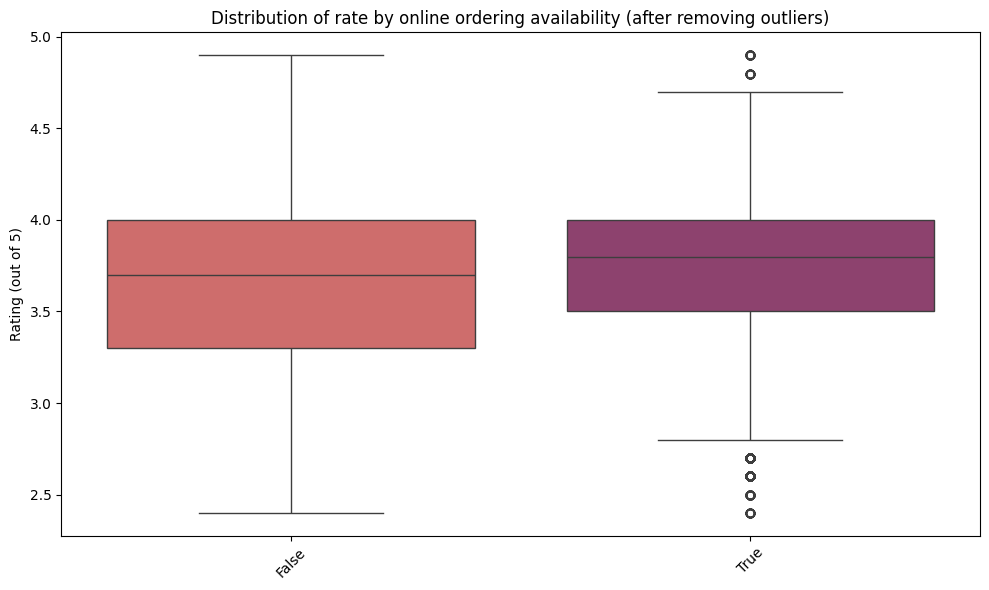

In [85]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df2[df2['rate'] > 2.3], x='online_order', y='rate', palette='flare')
ax.set_title('Distribution of rate by online ordering availability (after removing outliers)')
ax.set_xlabel('')
ax.set_ylabel('Rating (out of 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Findings

Slight Rating Boost with Online Ordering: Restaurants that offer online ordering have a slightly higher median rating (~3.8) than those that don’t (~3.7).

Outliers: Restaurants without online ordering have more low-rated outliers. Those with online ordering show outliers at both ends

Strategic Takeaways for a New Restaurant

Online Ordering Is Expected: Even though the rating boost is small, not offering online ordering might hurt more than offering it helps. Today, it’s something most customers expect.

Convenience Matters: Online ordering likely improves the customer experience by making things easier and faster, which might explain the small ratings bump.

It’s Not a Magic Fix: Having online ordering won’t guarantee high ratings. You still need to focus on great food, service, and ambiance to stand out.

10.How does offering table booking service affects the restaurant rating?

/tmp/ipython-input-1666950751.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




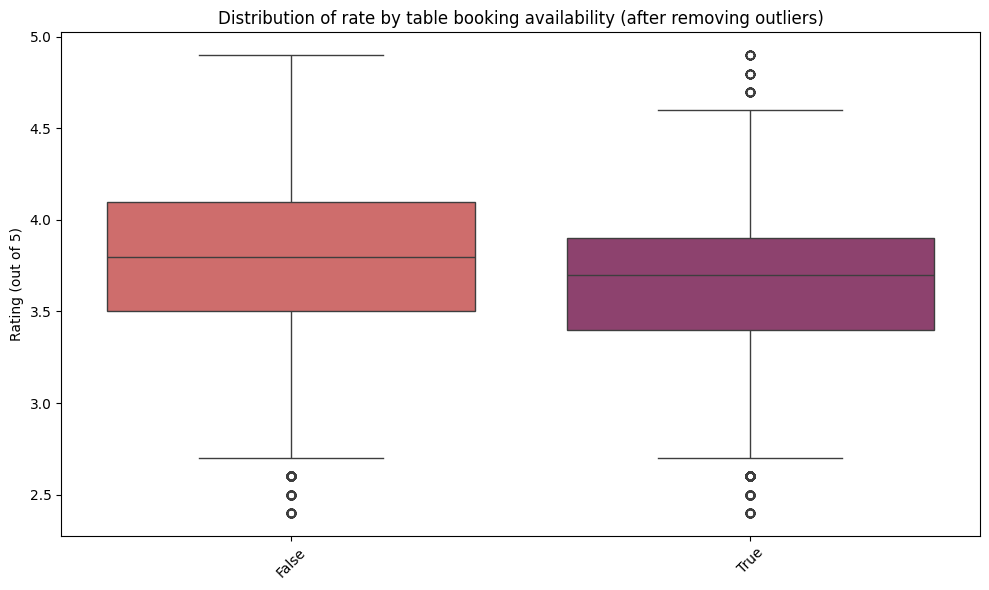

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df2[df2['rate'] > 2.3], x='delivery', y='rate', palette='flare')
ax.set_title('Distribution of rate by table booking availability (after removing outliers)')
ax.set_xlabel('')
ax.set_ylabel('Rating (out of 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Strategic Implications for a New Restaurant:

Customers Expect It for Formal Dining: If you’re targeting people who plan their meals (e.g., date nights, business lunches), table booking is often expected, not just a nice extra.

Essential for Premium Positioning: If your goal is to be seen as an upscale or fine dining place with high ratings, enabling table reservations should be a key part of your service.

## 11.what are the most popular dishes in Bangalore?

In [87]:
dishes = df2.loc[
    (df2['rate'] > 4) & (df2['votes'] > 1000) & (df2['dish_liked'] != 'Unknown'),
    ['dish_liked', 'rate', 'location', 'votes']].copy()

# split the strings of liked_dishes
dishes['dish_liked'] = dishes['dish_liked'].str.split(r',\s*')

# explode the liked_dishes from lists to rows
dishes = dishes.explode('dish_liked')

# remove white spaces
dishes['dish_liked'] = dishes['dish_liked'].str.strip()

# Calculate count, average rating and most common location for each dish
dish_analysis = (
    dishes
    .groupby('dish_liked')
    .agg(
        count=('dish_liked', 'count'),
        average_rating=('rate', 'mean'),
        votes=('votes', 'mean'),
        most_common_location=('location', lambda x: x.mode()[0] if not x.empty else None)
    )
    .reset_index()
    .sort_values('count', ascending=False)
)

dish_analysis.head(15).style.background_gradient(cmap='flare', axis=0)


,dish_liked,count,average_rating,votes,most_common_location
252,Cocktails,1236,4.382767,2974.939320,Koramangala 5th Block
632,Pasta,860,4.315465,2469.190698,Koramangala 5th Block
532,Mocktails,770,4.361558,2876.153247,Koramangala 5th Block
672,Pizza,716,4.308101,2400.643855,Lavelle Road
88,Burgers,506,4.323913,2705.065217,Koramangala 5th Block
585,Nachos,423,4.320567,2517.940898,Koramangala 5th Block
742,Salads,392,4.362500,2281.607143,Lavelle Road
55,Beer,328,4.303963,2200.000000,Koramangala 5th Block
829,Tiramisu,227,4.350661,2232.167401,Koramangala 5th Block
753,Sea Food,227,4.358590,3034.502203,Lavelle Road


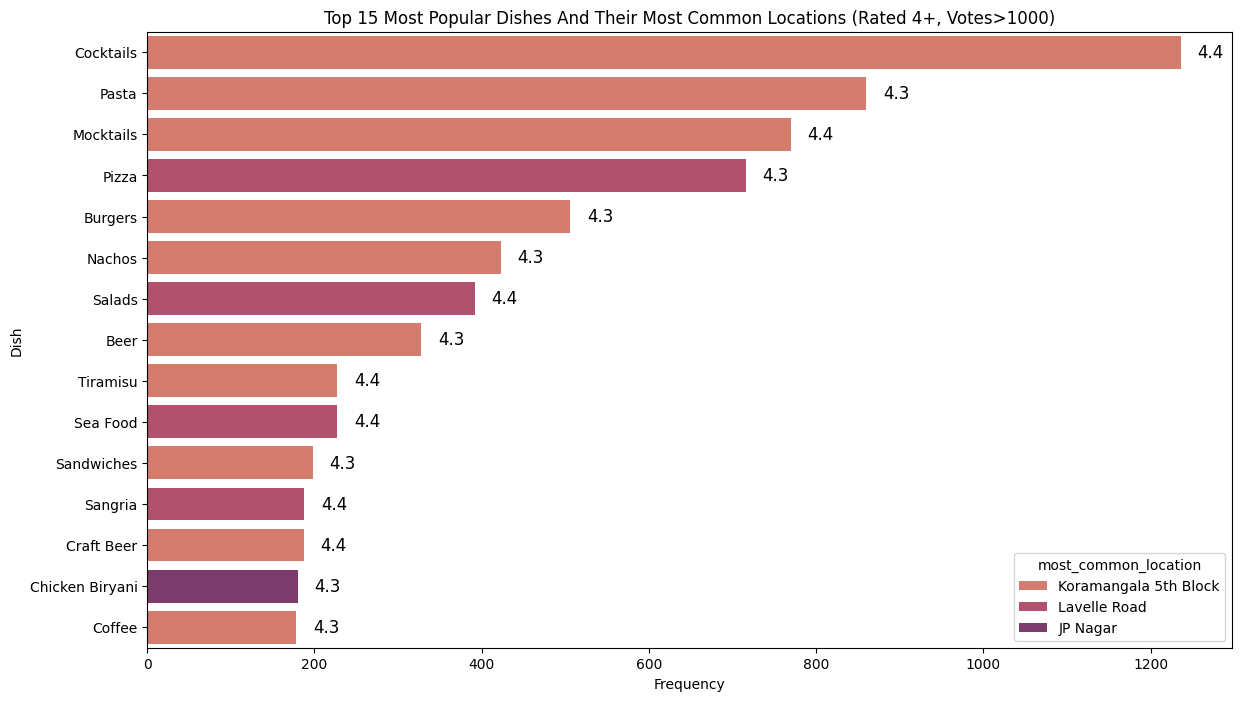

In [88]:
dish_analysis = dish_analysis.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='dish_liked', hue='most_common_location', data=dish_analysis, palette='flare', dodge=False)
plt.title('Top 15 Most Popular Dishes And Their Most Common Locations (Rated 4+, Votes>1000)')
plt.xlabel('Frequency')
plt.ylabel('Dish')

for i, (_, row) in enumerate(dish_analysis.iterrows()):
    plt.text(row['count']+20, i, f"{row['average_rating']:.1f}",
             va='center', fontsize=12)

plt.show()


Key Findings:

Cocktails, Pasta, and Mocktails Lead: Cocktails are the most frequently liked dish, Their most common location is Koramangala 5th Block.

Pasta and Mocktails follow as highly popular choices, both also predominantly found in Koramangala 5th Block.

Widespread Appeal of Global Comfort Foods: Dishes like Pizza, Burgers, Nachos, and Sandwiches are very popular, indicating a strong preference for international comfort food.

Beverages and Desserts are Key: Beyond main courses, Beer, Sea Food, Tiramisu, Sangria, Craft Beer, and Coffee also feature in the top 15, highlighting the importance of beverage programs and dessert offerings in driving positive customer sentiment in top restaurants.

Location Trends: Koramangala 5th Block and Lavelle Road frequently appear as the most common locations for these popular dishes and that these are high-density and high-rated restaurant hubs.

Strategic Implications for a New Restaurant:

Focus on Well-Executed Staples: Including popular dishes like Pasta, Pizza, and Burgers on your menu, executed exceptionally well, can appeal to a broad customer base and contribute to high ratings.

Strong Beverage Program: The prominence of Cocktails, Mocktails, Beer, Sangria, and Craft Beer suggests that a diverse and high-quality beverage menu is crucial for popular, high-rated restaurants.

Dessert Importance: Tiramisu's presence indicates that investing in standout desserts can significantly enhance the dining experience and garner positive feedback.

Location Matters: Being in locations like Koramangala 5th Block or Lavelle Road, where these popular dishes thrive, can provide a favorable environment for success.

## 12.what are the most common menu items in Bangalore?

In [89]:
#create a dataframe with a the needed columns
items = df2[['name', 'menu_item', 'location']].copy()
#drop duplicates
items = items.drop_duplicates()
#split the strings of liked_dishes
items['menu_item'] = items['menu_item'].str.split(',\s*')

#explode the liked_dishes from lists to rows (row per each)
items = items.explode('menu_item')

# Clean and filter AFTER exploding
items['menu_item'] = items['menu_item'].str.strip()
items = items[items['menu_item'] != '']  # Remove empty strings
items = items[items['menu_item'] != '[]']  # Remove any remaining '[]' strings
#remove white spaces
items['menu_item'] = items['menu_item'].str.strip()


# Calculate count, average rating and most common location for each dish
item_analysis = (
    items
    .groupby('menu_item')
    .agg(
        count=('menu_item', 'count'),
        most_common_location=('location', lambda x: x.mode()[0] if not x.empty else None)
    )
    .reset_index()
    .sort_values('count', ascending=False)
)

item_analysis.head(15)

<>:6: SyntaxWarning:

invalid escape sequence '\s'

<>:6: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-3773375870.py:6: SyntaxWarning:

invalid escape sequence '\s'



,menu_item,count,most_common_location
25737,'Chicken Fried Rice',3455,BTM
130166,'Veg Fried Rice',3368,BTM
93715,'Paneer Butter Masala',3081,BTM
65636,'Jeera Rice',2967,BTM
57688,'Gobi Manchurian',2647,BTM
47928,'Egg Fried Rice',2641,BTM
56718,'Ghee Rice',2613,BTM
23690,'Chicken Biryani',2297,BTM
94901,'Paneer Manchurian',2278,BTM
128662,'Veg Biryani',2267,BTM


/tmp/ipython-input-3627853459.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




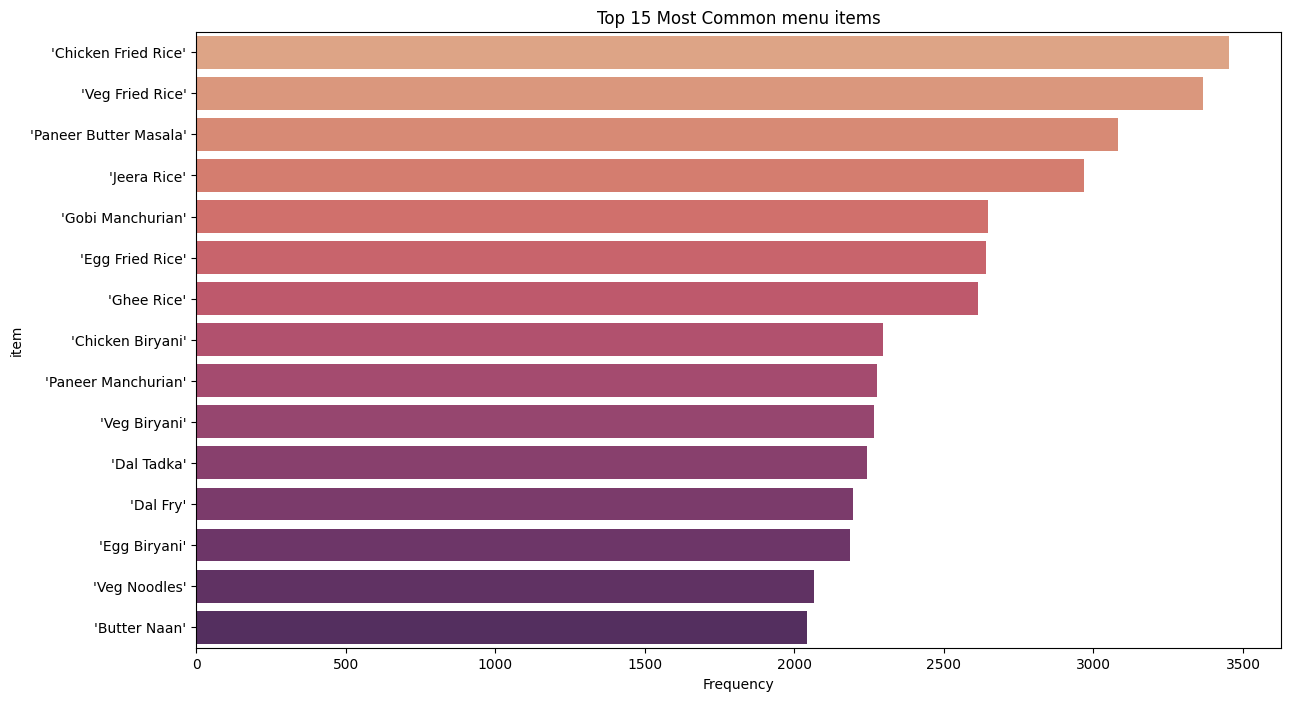

In [90]:
item_analysis = item_analysis.head(15)
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='menu_item', data=item_analysis, palette='flare')
plt.title('Top 15 Most Common menu items')
plt.xlabel('Frequency')
plt.ylabel('item')
plt.show()

Key Findings

Rice Dishes Dominate: Chicken Fried Rice and Veg Fried Rice are the most common.

Jeera Rice and Ghee Rice are also very popular rice is clearly a major part of local cuisine.

Classic Indian Favorites Are Everywhere:

BTM Layout Leads Again: For all top 15 dishes, BTM is the most common location, confirming it as a key food hotspot in Bangalore.

Popular ≠ High Rated: In Q11, high-rated dishes were often international (Cocktails, Pasta, Burgers). In this list, the focus is on Indian and Indo-Chinese staples — showing a difference between what’s widely consumed vs. what’s most praised.

Strategic Takeaways for a New Restaurant

Include Crowd Favorites: To attract a broad audience, include popular items like fried rice, biryani, dal, naan, and paneer dishes on your menu.

Stand Out with Quality or Innovation: These dishes are everywhere so to shine, focus on superior taste, presentation, or a unique twist

Know Your Audience: If you’re targeting the mass market, this list is your go-to.

## 13.Which restaurant chains are trending or most popular?

In [91]:
x = df2.query("`name` == 'Byg Brewski Brewing Company'").iloc[0]

cuisines = [col.replace('cuisine_', '') for col in x.index
            if col.startswith('cuisine_') and x[col] == 1]

types = [col.replace('type_', '') for col in x.index
         if col.startswith('type_') and x[col] == 1]

print('The most popular restaurant chain is Byg Brewski Brewing Company: ')
print("Cuisine(s):", cuisines)
print("Type(s):", types)

The most popular restaurant chain is Byg Brewski Brewing Company: 
Cuisine(s): ['North Indian', 'South Indian', 'Continental', 'Italian', 'Finger Food']
Type(s): ['microbrewery']


Key Findings

High Ratings Across the Board: Every top chain has an average rating of 4.2 or higher, proving they maintain quality across all locations.

Diverse Menus Work Well: Popular places often serve multiple cuisines like North Indian, Italian, Finger Food, and more. This helps them attract a wider customer base.

Strategic Takeaways for a New Restaurant or Chain

Focus on Experience, Not Just Food: Ambiance, drinks, music, and vibe are just as important as the food, Consider creating a social or nightlife-oriented experience.

Maintain Quality Across Locations: If you plan to open multiple outlets, make sure each one delivers consistently excellent service and food.

Balance Specialization and Variety: You can succeed by being very good at one thing (like burgers or breakfast), or by offering a broad, well-executed menu to appeal to more people.

Conclusion¶
Bangalore Restaurant Market: Key Insights & Strategic Implications
1. Restaurant Landscape: Dense, Diverse & Competitive

BTM Layout has the highest number of restaurants, highlighting fierce competition and customer variety.
Popular formats:

Quick Bites and Casual Dining dominate reflecting demand for affordable, convenient, and relaxed experiences.
Top Services:

Delivery and Dine-out are the most common, far exceeding Cafes, Buffets, or Nightlife. Strategy Tip: Focus on Quick Bites/Casual Dining + Delivery to align with the most active market segments.
2. Cuisine Trends: Local Favorites vs. Global Excellence
Most Common Cuisines:

North Indian and Chinese lead these are familiar, everyday choices.
High Ratings Linked to:
Salad, Asian, American, and Desserts less common but more consistently praised.
Top Restaurants Often Serve:

Asian/Thai/Chinese fusion, plus Desserts.
Strategy Tip: Consider offering niche global cuisines or hybrid menus with consistent quality to tap into the high-rated segment.

3. Menu Choices: Staple vs. Premium Appeal
Common Items:

Fried rice, Paneer dishes, Dal, and Biryani dominate menus these are safe staples.
Top-Rated Dishes Include:

Cocktails, Pasta, Mocktails, Pizza pointing to a desire for international flavors and experiential dining.
Strategy Tip: Blend popular Indian staples with a few well executed global items to attract a wider audience and improve ratings.

4. Business Models & Key Success Factors
Pricing and Ratings:

Higher-priced places generally receive better ratings likely due to quality food, ambiance, and service.
Fine Dining and Clubs have the highest average cost.
Service Features:

Online Ordering = Slightly Better Ratings convenience boosts satisfaction.
Table Booking = Higher Ratings — expected in upscale spots and adds professionalism.
Ghost Kitchens & Shared Brands:

Many restaurants share phone numbers, especially in delivery — proving the rise of cloud kitchens and multi-brand delivery models.
Trending Chains:

Top chains like Byg Brewski, Arbor, Social, and Flechazo thrive by offering:

Ambiance, drinks, diverse menus, and a strong social experience.
Strategy Tips:

Offer online ordering and table booking to meet modern expectations.
Consider a multi-brand delivery model or cloud kitchen if targeting the delivery-only segment.
If building a chain or upscale brand, focus on experience + quality + consistency across outlets.